In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
dataset=pd.read_csv("/kaggle/input/ps-dataset/order_data_last_six_month.xlsx - Worksheet.csv")
associated_dataset=pd.read_csv("/kaggle/input/ps-dataset/associated_order_item_data_last_six_month.xlsx - Worksheet.csv")

In [10]:
dataset['order_date']=pd.to_datetime(dataset['order_date'],dayfirst=True)

In [11]:
customer_behavior=pd.DataFrame()

In [13]:
customer_behavior['customer_id']=dataset['customer_id'].unique()

In [15]:
df=dataset.copy()

In [38]:
for idx in customer_behavior['customer_id']:
    customer_data = df[df['customer_id'] == idx]
    
    total_orders = customer_data['order_id'].nunique()
    total_order_days = customer_data['order_date'].nunique()
    
    average_orders_placed = total_orders / total_order_days if total_order_days > 0 else 0
    total_order_value = customer_data['net_order_amount'].sum()
    average_order_value = total_order_value / total_orders if total_orders > 0 else 0

    # Calculate average order gap days
    order_dates = customer_data['order_date'].sort_values()
    order_gaps = order_dates.diff().dt.days.dropna()
    avg_order_gap_days = order_gaps.mean() if not order_gaps.empty else 0

    # Order consistency score (1 / std of gaps)
    order_consistency_score = 1 / (order_gaps.std() + 1e-5) if len(order_gaps) > 1 else 0

    # Assign to customer_behavior DataFrame
    customer_behavior.loc[customer_behavior['customer_id'] == idx, 'Total Orders'] = total_orders
    customer_behavior.loc[customer_behavior['customer_id'] == idx, 'Total Order Days'] = total_order_days
    customer_behavior.loc[customer_behavior['customer_id'] == idx, 'Average Orders Placed'] = average_orders_placed
    customer_behavior.loc[customer_behavior['customer_id'] == idx, 'Total Order Value'] = total_order_value
    customer_behavior.loc[customer_behavior['customer_id'] == idx, 'Average Order Value'] = average_order_value
    customer_behavior.loc[customer_behavior['customer_id'] == idx, 'Average Order Gap Days'] = avg_order_gap_days
    customer_behavior.loc[customer_behavior['customer_id'] == idx, 'Order Consistency Score'] = order_consistency_score


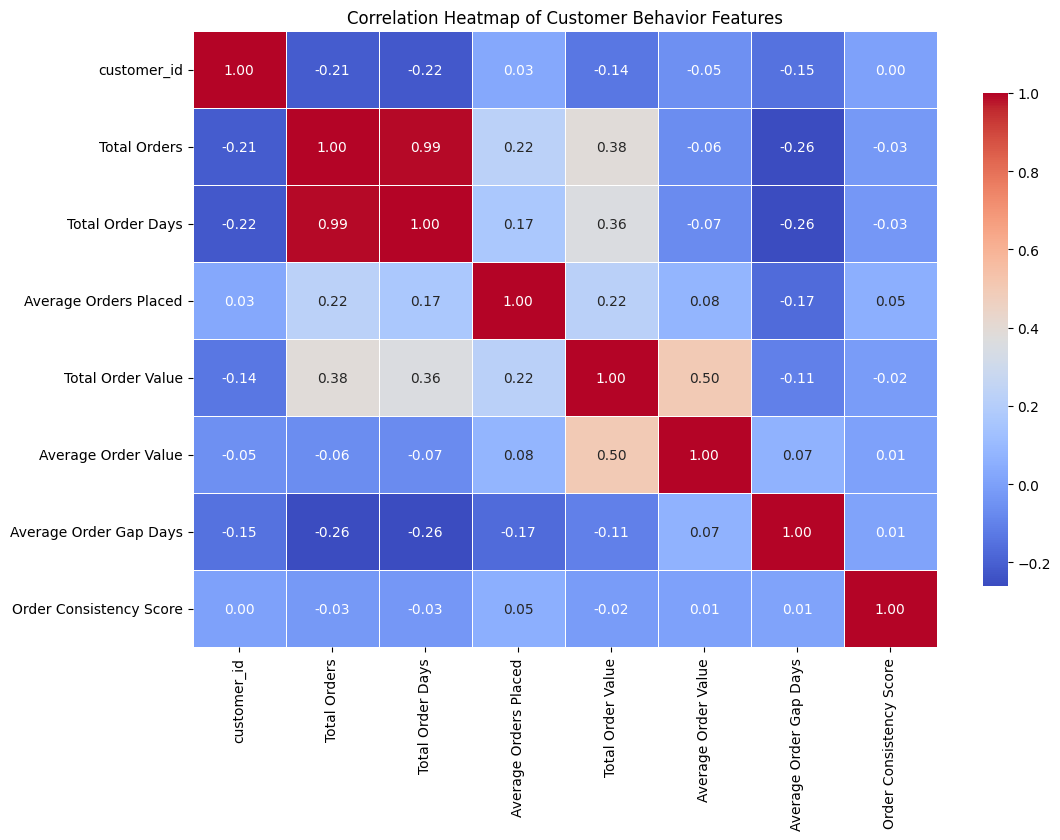

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = customer_behavior.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})

# Display the plot
plt.title("Correlation Heatmap of Customer Behavior Features")
plt.show()

In [42]:
customer_behavior.to_csv("Customer_Behavior_Data.csv",index=False)